# Testing

testing the code in a single day, on `data/cleaned_data/2020-02-04mod.csv.gz`

In [1]:
import glob
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Constants

In [2]:
# 15 points, ranging from 1 minute to one day, in a log scale, represented in seconds
TIME_DELTAS = np.geomspace(60, 60*60*24, num=15, dtype=int)
REQ_COLS = ['CreatedAt_Full', 'Hashtags']

## Parsing

In [15]:
dtypes = {'CreatedAt_Full': str, 'Hashtags': str}
parse_dates = ['CreatedAt_Full']

df = pd.read_csv('../data/cleaned_data/2020-02-04mod.csv.gz', usecols=REQ_COLS, dtype=dtypes, parse_dates=parse_dates)
# output size of dataset
print(f'Rows: {df.shape[0]}')
print(f'Rows with null values: {df.isnull().any(axis=1).sum()}')
# drop rows with null values
df.dropna(inplace=True)

Rows: 1758179
Rows with null values:: 1143006


In [16]:
# convert date to pandas datetime (is this necessary?)
df['CreatedAt_Full'] = pd.to_datetime(df['CreatedAt_Full'])

# sort by date
df.sort_values(by='CreatedAt_Full', inplace=True)

df.head()

,CreatedAt_Full,Hashtags
0,2020-02-04 00:00:00+00:00,'beijing'
28,2020-02-04 00:00:00+00:00,'coronavirus'
29,2020-02-04 00:00:00+00:00,'wuhan'
30,2020-02-04 00:00:00+00:00,'coronavirus'
31,2020-02-04 00:00:00+00:00,'coronavirus'


In [17]:
print(df.dtypes)
print(df.shape)

CreatedAt_Full    datetime64[ns, tzutc()]
Hashtags                           object
dtype: object
(615173, 2)


In [18]:
START_DATE = df.iloc[0]['CreatedAt_Full']

## Analyzing

In [19]:
# for every time delta, get the number of hashtags created between START and that time delta
# return total hashtags as well as distinct hashtags

def get_num_hashtags(input_df, time_delta, start_date):
    end_date = start_date + pd.Timedelta(seconds=time_delta)
    new_df = input_df[(input_df['CreatedAt_Full'] >= start_date) & (input_df['CreatedAt_Full'] < end_date)]
    return new_df.shape[0], len(new_df['Hashtags'].unique())

In [20]:
total_hashtags_test = []
unique_hashtags_test = []

for time_delta in TIME_DELTAS:
    total, unique = get_num_hashtags(df, time_delta, START_DATE)
    total_hashtags_test.append(total)
    unique_hashtags_test.append(unique)
    print(f'{time_delta} seconds: {total} total hashtags, {unique} unique hashtags')

60 seconds: 573 total hashtags, 299 unique hashtags
100 seconds: 890 total hashtags, 427 unique hashtags
169 seconds: 1422 total hashtags, 587 unique hashtags
285 seconds: 2375 total hashtags, 854 unique hashtags
479 seconds: 3961 total hashtags, 1262 unique hashtags
805 seconds: 6642 total hashtags, 1866 unique hashtags
1354 seconds: 10731 total hashtags, 2554 unique hashtags
2276 seconds: 17582 total hashtags, 3591 unique hashtags
3827 seconds: 19227 total hashtags, 3808 unique hashtags
6434 seconds: 31279 total hashtags, 5482 unique hashtags
10817 seconds: 47864 total hashtags, 7638 unique hashtags
18185 seconds: 88763 total hashtags, 11625 unique hashtags
30571 seconds: 313412 total hashtags, 18075 unique hashtags
51394 seconds: 431893 total hashtags, 27764 unique hashtags
86400 seconds: 615173 total hashtags, 41319 unique hashtags


## Graphing

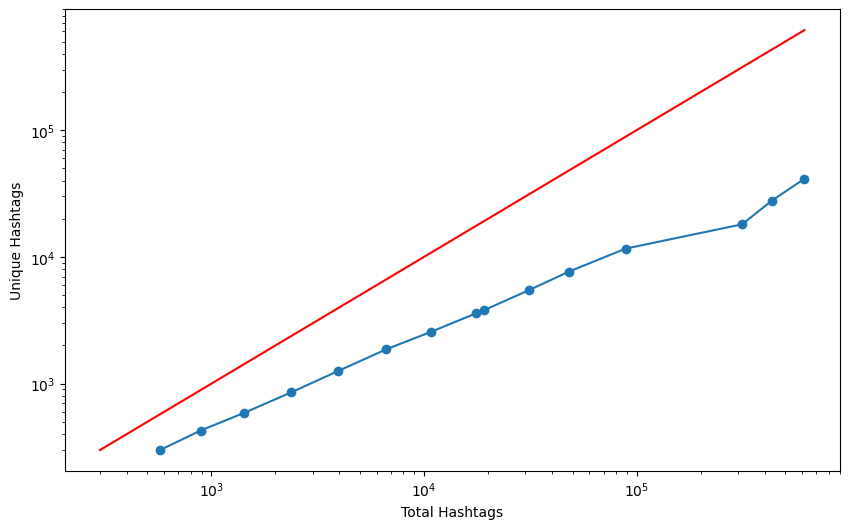

In [22]:
# use matplotlib to graph a connected scatterplot of the number of hashtags vs total hashtags 
# plot total hashtags vs unique hashtags

plt.figure(figsize=(10, 6))
plt.plot(total_hashtags_test, unique_hashtags_test, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Hashtags')
plt.ylabel('Unique Hashtags')

# add x=y line
max_coord = max(max(total_hashtags_test), max(unique_hashtags_test))
min_coord = min(min(total_hashtags_test), min(unique_hashtags_test))
x = np.linspace(min_coord, max_coord, 100)
y = x
plt.plot(x, y, color='red')
plt.show()